# Практическая работа 8

In [22]:
!pip install apyori
!pip install efficient_apriori
!pip install apriori_python
!pip install fpgrowth-py

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from apyori import apriori as apyori_apriori
from efficient_apriori import apriori as efficient_apriori
from apriori_python import apriori as apriori_python
from fpgrowth_py import fpgrowth

## Задание 1
Загрузить данные Market_Basket_Optimisation.csv

In [2]:
url = 'https://raw.githubusercontent.com/InspectorJelly/BigDataMirea/refs/heads/main/datasets/Market_Basket_Optimisation.csv'
data = pd.read_csv(url)

## Задание 2
Визуализировать данные (отразить на гистограммах относительную и фактическую частоту встречаемости для 20 наиболее популярных товаров)

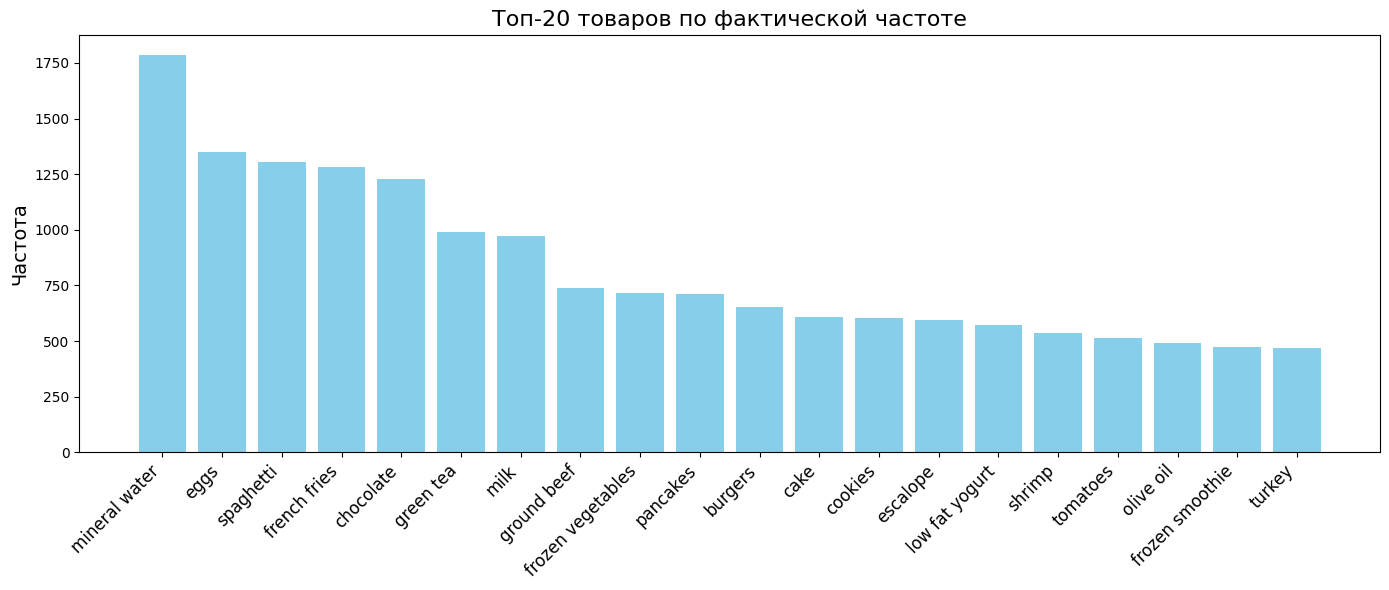

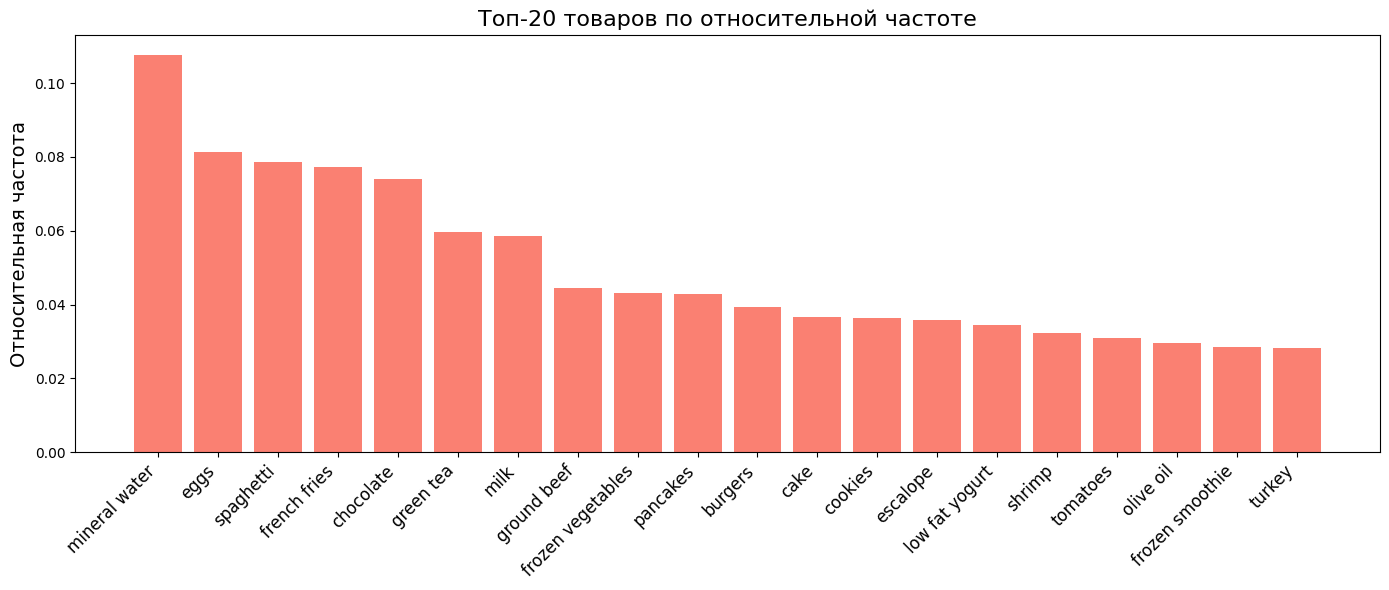

In [3]:
all_items = data.values.flatten()
all_items = pd.Series(all_items).dropna()
item_counts = all_items.value_counts()
top_20_items = item_counts.head(20)
relative_frequencies = top_20_items / top_20_items.sum()

plt.figure(figsize=(14, 6))
plt.bar(top_20_items.index, top_20_items.values, color='skyblue')
plt.title('Топ-20 товаров по фактической частоте', fontsize=16)
plt.ylabel('Частота', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plt.bar(relative_frequencies.index, relative_frequencies.values, color='salmon')
plt.title('Топ-20 товаров по относительной частоте', fontsize=16)
plt.ylabel('Относительная частота', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

## Задание 3
Применить алгоритм Apriori, используя 3 разные библиотеки (apriori_python, apyori, efficient_apriori). Подобрать гиперпараметры для алгоритмов так, чтобы выводилось порядка 10 наилучших правил.

In [31]:
transactions = data.apply(lambda row: row.dropna().tolist(), axis=1).tolist()

#apyori
start = time.time()
print("Results with apyori:")
apyori_results = list(apyori_apriori(transactions, min_support=0.005, min_confidence=0.3))
for rule in apyori_results[:10]:
    print(rule)
apyori_time = time.time() - start

#efficient_apriori
start = time.time()
print("\nResults with efficient_apriori:")
itemsets, rules = efficient_apriori(transactions, min_support=0.005, min_confidence=0.3)
for rule in sorted(rules, key=lambda x: x.lift, reverse=True)[:10]:
    print(rule)
efficient_apriori_time = time.time() - start

#apriori_python
start = time.time()
print("\nResults with apriori_python:")
freq_itemsets, rules = apriori_python(transactions, minSup=0.005, minConf=0.3)


# Вывод правил
print("Rules (apriori_python):")
for rule in rules[:10]:
    antecedent, consequent, confidence = rule
    print(f"Rule: {set(antecedent)} -> {set(consequent)}, Confidence: {confidence}")
apriori_python_time = time.time() - start

Results with apyori:
RelationRecord(items=frozenset({'almonds', 'eggs'}), support=0.006533333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'eggs'}), confidence=0.32236842105263164, lift=1.7935928471029208)])
RelationRecord(items=frozenset({'mineral water', 'almonds'}), support=0.007466666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'mineral water'}), confidence=0.368421052631579, lift=1.5462551173681267)])
RelationRecord(items=frozenset({'mineral water', 'avocado'}), support=0.011466666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'avocado'}), items_add=frozenset({'mineral water'}), confidence=0.3453815261044177, lift=1.449558727354859)])
RelationRecord(items=frozenset({'black tea', 'mineral water'}), support=0.005333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'black tea'}), items_add=frozenset({'mineral water'}), conf

## Задание 4
Применить алгоритм FP-Growth из библиотеки fpgrowth_py. Подобрать гиперпараметры для алгоритма так, чтобы выводилось порядка 10 наилучших правил.

In [32]:
start = time.time()
freqItemSet, rules = fpgrowth(transactions, minSupRatio=0.01, minConf=0.2)
best_fp_rules = sorted(rules, key=lambda rule: rule[2], reverse=True)[:10]
for rule in best_fp_rules:
    print(f"Rule: {rule[0]} -> {rule[1]}, confidence: {rule[2]}")
fp_time = time.time() - start

Rule: {'eggs', 'ground beef'} -> {'mineral water'}, confidence: 0.5066666666666667
Rule: {'milk', 'ground beef'} -> {'mineral water'}, confidence: 0.503030303030303
Rule: {'ground beef', 'chocolate'} -> {'mineral water'}, confidence: 0.47398843930635837
Rule: {'milk', 'frozen vegetables'} -> {'mineral water'}, confidence: 0.4689265536723164
Rule: {'soup'} -> {'mineral water'}, confidence: 0.45646437994722955
Rule: {'spaghetti', 'pancakes'} -> {'mineral water'}, confidence: 0.455026455026455
Rule: {'olive oil', 'spaghetti'} -> {'mineral water'}, confidence: 0.4476744186046512
Rule: {'milk', 'spaghetti'} -> {'mineral water'}, confidence: 0.44360902255639095
Rule: {'milk', 'chocolate'} -> {'mineral water'}, confidence: 0.43568464730290457
Rule: {'spaghetti', 'ground beef'} -> {'mineral water'}, confidence: 0.43537414965986393


## Задание 5
Сравнить время выполнения всех алгоритмов и построить гистограмму.

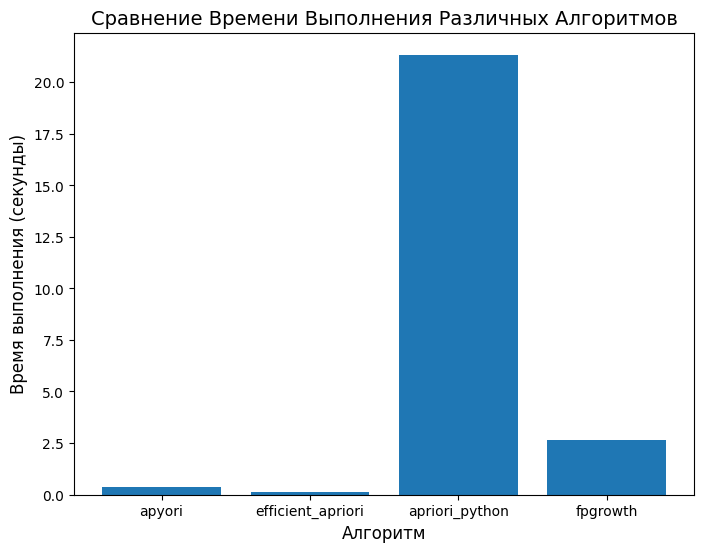

Time for apyori: 0.3590 seconds
Time for efficient_apriori: 0.1284 seconds
Time for apriori_python: 21.3364 seconds
Time for fpgrowth: 2.6345 seconds


In [33]:
transactions = data.apply(lambda row: row.dropna().tolist(), axis=1).tolist()
execution_times = {}
execution_times['apyori'] = apyori_time
execution_times['efficient_apriori'] = efficient_apriori_time
execution_times['apriori_python'] = apriori_python_time
execution_times['fpgrowth'] = fp_time

algorithms = list(execution_times.keys())
times = list(execution_times.values())

plt.figure(figsize=(8, 6))
plt.bar(algorithms, times)
plt.title('Сравнение Времени Выполнения Различных Алгоритмов', fontsize=14)
plt.xlabel('Алгоритм', fontsize=12)
plt.ylabel('Время выполнения (секунды)', fontsize=12)
plt.show()
for algorithm, exec_time in execution_times.items():
    print(f"Time for {algorithm}: {exec_time:.4f} seconds")

## Задание 6
Загрузить данные data.csv

In [35]:
url = 'https://raw.githubusercontent.com/InspectorJelly/BigDataMirea/refs/heads/main/datasets/data.csv'
data = pd.read_csv(url)

## Задание 7
Визуализировать данные (отразить на гистограммах относительную и фактическую частоту встречаемости для 20 наиболее популярных товаров).

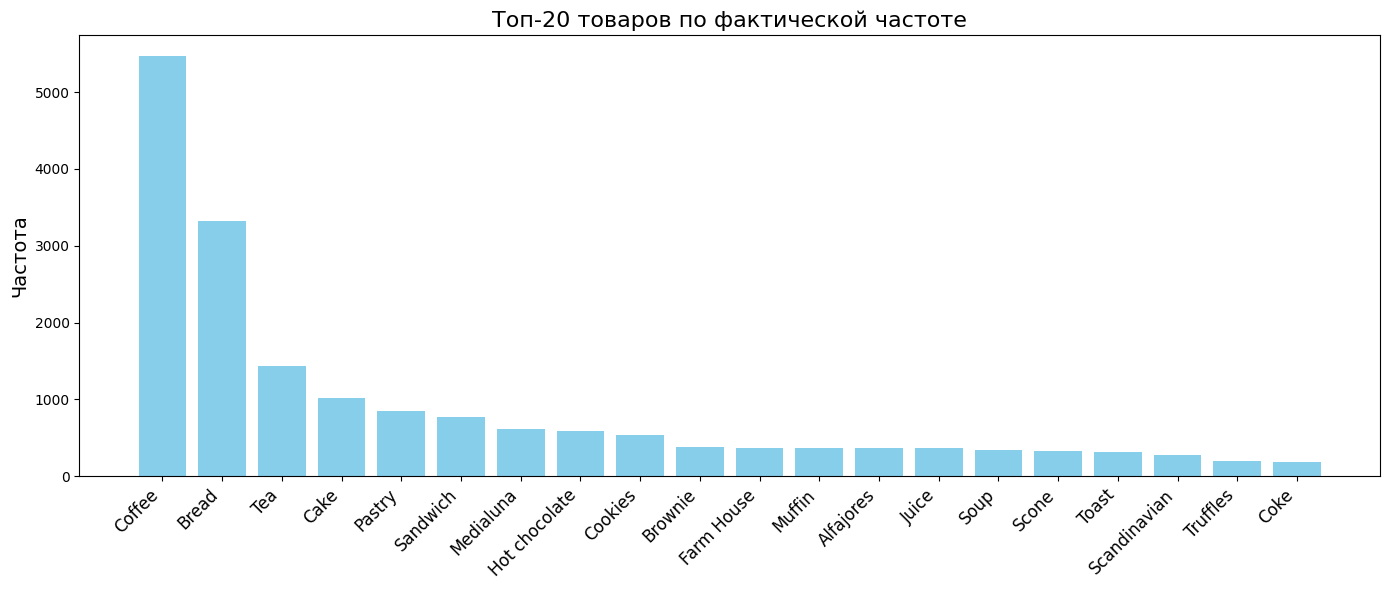

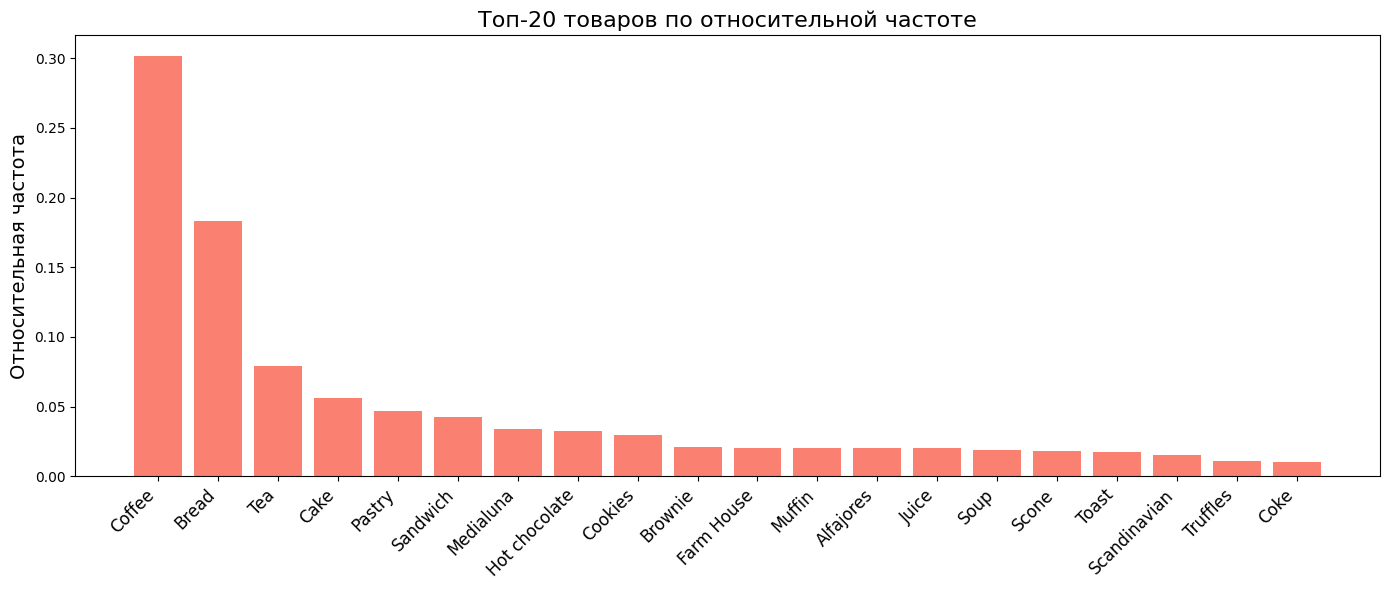

In [36]:
all_items = data.values.flatten()
all_items = pd.Series(all_items).dropna()
item_counts = all_items.value_counts()
top_20_items = item_counts.head(20)
relative_frequencies = top_20_items / top_20_items.sum()

plt.figure(figsize=(14, 6))
plt.bar(top_20_items.index, top_20_items.values, color='skyblue')
plt.title('Топ-20 товаров по фактической частоте', fontsize=16)
plt.ylabel('Частота', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plt.bar(relative_frequencies.index, relative_frequencies.values, color='salmon')
plt.title('Топ-20 товаров по относительной частоте', fontsize=16)
plt.ylabel('Относительная частота', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

## Задание 8
Применить алгоритм Apriori, используя 3 разные библиотеки (apriori_python, apyori, efficient_apriori). Подобрать гиперпараметры для алгоритмов так, чтобы выводилось порядка 10 наилучших правил.

In [37]:
transactions = data.apply(lambda row: row.dropna().tolist(), axis=1).tolist()

#apyori
start = time.time()
print("Results with apyori:")
apyori_results = list(apyori_apriori(transactions, min_support=0.005, min_confidence=0.3))
for rule in apyori_results[:10]:
    print(rule)
apyori_time = time.time() - start

#efficient_apriori
start = time.time()
print("\nResults with efficient_apriori:")
itemsets, rules = efficient_apriori(transactions, min_support=0.005, min_confidence=0.3)
for rule in sorted(rules, key=lambda x: x.lift, reverse=True)[:10]:
    print(rule)
efficient_apriori_time = time.time() - start

#apriori_python
start = time.time()
print("\nResults with apriori_python:")
freq_itemsets, rules = apriori_python(transactions, minSup=0.005, minConf=0.3)


# Вывод правил
print("Rules (apriori_python):")
for rule in rules[:10]:
    antecedent, consequent, confidence = rule
    print(f"Rule: {set(antecedent)} -> {set(consequent)}, Confidence: {confidence}")
apriori_python_time = time.time() - start

Results with apyori:
RelationRecord(items=frozenset({'Bread'}), support=0.3248688352570829, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Bread'}), confidence=0.3248688352570829, lift=1.0)])
RelationRecord(items=frozenset({'Coffee'}), support=0.4751311647429171, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Coffee'}), confidence=0.4751311647429171, lift=1.0)])
RelationRecord(items=frozenset({'Alfajores', 'Coffee'}), support=0.01951731374606506, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Alfajores'}), items_add=frozenset({'Coffee'}), confidence=0.5406976744186047, lift=1.137996651327143)])
RelationRecord(items=frozenset({'Jam', 'Bread'}), support=0.005036726128016789, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Jam'}), items_add=frozenset({'Bread'}), confidence=0.3380281690140845, lift=1.0405066055246206)])
RelationRecord(items=frozenset({'Bread', 'Pastry'}), support=0.028961175236

## Задание 9
Применить алгоритм FP-Growth из библиотеки fpgrowth_py. Подобрать гиперпараметры для алгоритма так, чтобы выводилось порядка 10 наилучших правил.

In [39]:
start = time.time()
freqItemSet, rules = fpgrowth(transactions, minSupRatio=0.01, minConf=0.2)
best_fp_rules = sorted(rules, key=lambda rule: rule[2], reverse=True)[:10]
for rule in best_fp_rules:
    print(f"Rule: {rule[0]} -> {rule[1]}, confidence: {rule[2]}")
fp_time = time.time() - start

Rule: {'Toast'} -> {'Coffee'}, confidence: 0.7044025157232704
Rule: {'Spanish Brunch'} -> {'Coffee'}, confidence: 0.5988372093023255
Rule: {'Medialuna'} -> {'Coffee'}, confidence: 0.5692307692307692
Rule: {'Medialuna'} -> {'Coffee'}, confidence: 0.5692307692307692
Rule: {'Pastry'} -> {'Coffee'}, confidence: 0.5521472392638037
Rule: {'Pastry'} -> {'Coffee'}, confidence: 0.5521472392638037
Rule: {'Tiffin'} -> {'Coffee'}, confidence: 0.547945205479452
Rule: {'Alfajores'} -> {'Coffee'}, confidence: 0.5406976744186046
Rule: {'Juice'} -> {'Coffee'}, confidence: 0.5342465753424658
Rule: {'Sandwich'} -> {'Coffee'}, confidence: 0.5323529411764706


## Задание 10

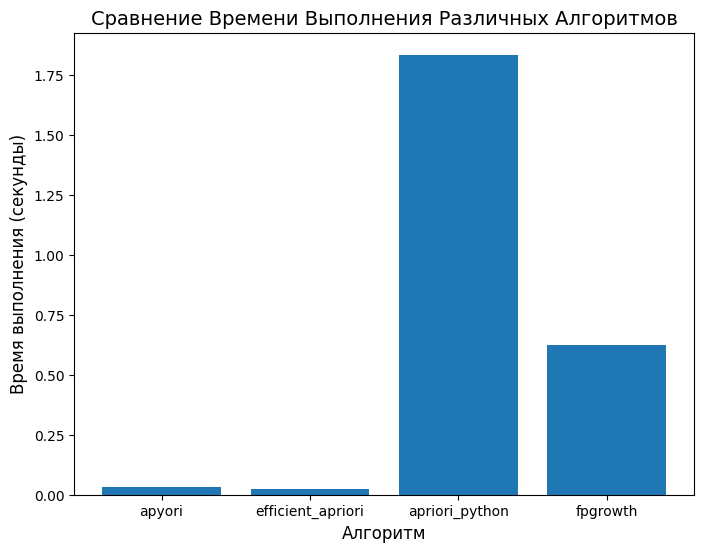

Time for apyori: 0.0318 seconds
Time for efficient_apriori: 0.0238 seconds
Time for apriori_python: 1.8355 seconds
Time for fpgrowth: 0.6248 seconds


In [40]:
transactions = data.apply(lambda row: row.dropna().tolist(), axis=1).tolist()
execution_times = {}
execution_times['apyori'] = apyori_time
execution_times['efficient_apriori'] = efficient_apriori_time
execution_times['apriori_python'] = apriori_python_time
execution_times['fpgrowth'] = fp_time

algorithms = list(execution_times.keys())
times = list(execution_times.values())

plt.figure(figsize=(8, 6))
plt.bar(algorithms, times)
plt.title('Сравнение Времени Выполнения Различных Алгоритмов', fontsize=14)
plt.xlabel('Алгоритм', fontsize=12)
plt.ylabel('Время выполнения (секунды)', fontsize=12)
plt.show()
for algorithm, exec_time in execution_times.items():
    print(f"Time for {algorithm}: {exec_time:.4f} seconds")